# Algorytmy sortowania

Przygotowanymi przeze mnie algorytmami sortowania są:
+ Sortowanie przez wybieranie
+ Sortowanie przez wstawianie
+ Sortowanie przez scalanie
+ Sortowanie szybkie
+ Sortowanie przez zliczanie
Każdy z algorytmów jest niezależną funkcją, która operuje na tablicy danych. Zostały one zaimplementowane w języku Python 3.

Aby uniezależnić czas wykonania programów od generowania danych do posortowania, robię to przed rozpoczęciem testów. Czas każdego algorytmu sprawdzam na listach o dziesięciu różnych wielkościach. Dla algorytmów naiwych są one z przedziału 2000-20000, a dla pozostałych z przedziału 200000-2000000, a więc sto razy większe. Każda wielkość ma reprezentację w postaci danych losowych, posortowanych rosnąco, posortowanych malejąco, oraz V-kształtnych i A-kształtych, czyli połowicznie wstępnie posortowanych. Do mierzenia czasu używam magicznej funkcji `%timeit` Jupyter Notebooka.

In [16]:
import random
import copy
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SIZES = [(n+1)*200000 for n in range(10)]
SIZES_s = [(n+1)*2000 for n in range(10)]
DANE = ['Losowe', 'Posortowane rosnąco', 'Posortowane malejąco', 'A-kształtne', 'V-kształtne']

s = 0
e = 200001

TAB_random = {}
TAB_asc = {}
TAB_desc = {}
TAB_v = {}
TAB_a = {}
TAB_part = {}

In [17]:
%%time
for n in SIZES:
    TAB_random[n] = [random.randint(s, e) for _ in range(n)]
    TAB_asc[n] = list(sorted([random.randint(s, e) for _ in range(n)]))
    TAB_desc[n] = list(sorted([random.randint(s, e) for _ in range(n)], reverse=True))
    TAB_v[n] = list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True)) + list(sorted([random.randint(s, e) for _ in range(n//2)]))
    TAB_a[n] = list(sorted([random.randint(s, e) for _ in range(n//2)])) + list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True))
    
for n in SIZES_s:
    TAB_random[n] = [random.randint(s, e) for _ in range(n)]
    TAB_asc[n] = list(sorted([random.randint(s, e) for _ in range(n)]))
    TAB_desc[n] = list(sorted([random.randint(s, e) for _ in range(n)], reverse=True))
    TAB_v[n] = list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True)) + list(sorted([random.randint(s, e) for _ in range(n//2)]))
    TAB_a[n] = list(sorted([random.randint(s, e) for _ in range(n//2)])) + list(sorted([random.randint(s, e) for _ in range(n//2)], reverse=True))

print("Wygenerowano dane.")

Wygenerowano dane.
Wall time: 50 s


## Algorytmy naiwne

### Sortowanie przez wybieranie
Pierwszym zaimplementowanym przeze mnie algorytmem jest sortowanie przez wybieranie. Do jego stworzenia potrzebna jest prosta funkcja minium. Należy wziąć pod uwagę, że zamieniając miejscami elementy po wyszukaniu indeksu minimum, trzeba dodać wartość kroku pętli do tego indeksu.

In [3]:
def min(t):
    index = 0
    for i in range(len(t)):
        if t[i] < t[index]:
            index = i
    return index

def SelectionSort(tab):
    for i in range(len(tab)):
        index = min(tab[i:])
        tab[i], tab[index+i] = tab[index+i], tab[i]
    return tab

In [4]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_random[SIZES_s[i]])
    %timeit SelectionSort(t[SIZES_s[i]])

Testuję dla:  2000
84.5 ms ± 805 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  4000
327 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
701 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
1.26 s ± 8.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
1.99 s ± 8.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
2.87 s ± 8.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
3.98 s ± 17.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
5.28 s ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
6.73 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
9.6 s ± 460 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_asc[SIZES_s[i]])
    %timeit SelectionSort(t[SIZES_s[i]])

Testuję dla:  2000
86.7 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  4000
363 ms ± 9.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
818 ms ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
1.39 s ± 25.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
2.22 s ± 25.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
3.29 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
4.51 s ± 201 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
5.94 s ± 210 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
7.63 s ± 282 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
9.48 s ± 308 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_desc[SIZES_s[i]])
    %timeit SelectionSort(t[SIZES_s[i]])

Testuję dla:  2000
90.5 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  4000
339 ms ± 6.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
793 ms ± 42.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
1.42 s ± 37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
2.07 s ± 92.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
2.97 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
4.1 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
5.44 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
6.75 s ± 41.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
9 s ± 344 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_v[SIZES_s[i]])
    %timeit SelectionSort(t[SIZES_s[i]])

Testuję dla:  2000
79.4 ms ± 970 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  4000
323 ms ± 7.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
724 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
1.29 s ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
2.01 s ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
2.94 s ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
4.09 s ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
5.41 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
7.56 s ± 245 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
9.38 s ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_a[SIZES_s[i]])
    %timeit SelectionSort(t[SIZES_s[i]])

Testuję dla:  2000
83.7 ms ± 773 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  4000
342 ms ± 6.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
729 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
1.28 s ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
2.1 s ± 71.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
3.2 s ± 65.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
4.45 s ± 80.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
5.61 s ± 287 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
6.9 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
9.54 s ± 287 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Sortowanie przez wstawianie
Drugim zaimplementowanym naiwnym algorytmem jest sortowanie przez wstawianie. Istotne tutaj jest zapamiętanie wstawianego elementu i przesuwanie wszystkich elementów większych od niego.

In [56]:
def InsertionSort(tab):
    for i in range(1, len(tab)):
        el = tab[i]
        j = i
        while el < tab[j-1] and j > 0:
            tab[j] = tab[j-1]
            j = j - 1
        tab[j] = el
    return tab

In [12]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_random[SIZES_s[i]])
    %timeit InsertionSort(t[SIZES_s[i]])

Testuję dla:  2000
158 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Testuję dla:  4000
307 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
472 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
642 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
799 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
965 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
1.12 ms ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
1.37 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
1.45 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
1.64 ms ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_asc[SIZES_s[i]])
    %timeit InsertionSort(t[SIZES_s[i]])

Testuję dla:  2000
153 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Testuję dla:  4000
312 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  6000
476 µs ± 2.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  8000
641 µs ± 5.05 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  10000
826 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  12000
1.01 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  14000
1.33 ms ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  16000
1.43 ms ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  18000
1.62 ms ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Testuję dla:  20000
1.69 ms ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_desc[SIZES_s[i]])
    %timeit InsertionSort(t[SIZES_s[i]])

Testuję dla:  2000
158 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  4000
478 µs ± 48.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
476 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
641 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
793 µs ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
1.04 ms ± 79.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
1.11 ms ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
1.34 ms ± 88.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
1.73 ms ± 405 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
1.62 ms ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_v[SIZES_s[i]])
    %timeit InsertionSort(t[SIZES_s[i]])

Testuję dla:  2000
168 µs ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Testuję dla:  4000
333 µs ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
469 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
659 µs ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
810 µs ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
960 µs ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
1.17 ms ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
1.29 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
1.55 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
1.65 ms ± 88 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES_s[i])
    t[SIZES_s[i]] = copy.deepcopy(TAB_a[SIZES_s[i]])
    %timeit InsertionSort(t[SIZES_s[i]])

Testuję dla:  2000
157 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Testuję dla:  4000
310 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  6000
481 µs ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  8000
616 µs ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  10000
817 µs ± 49.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  12000
986 µs ± 94.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  14000
1.11 ms ± 23 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  16000
1.29 ms ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  18000
1.48 ms ± 45 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  20000
1.63 ms ± 33.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Podsumowanie algorytmów naiwnych

In [46]:
wyniki = {'Selection Sort':[0.0845, 0.327, 0.701, 1.26, 1.99, 2.87, 3.98, 5.28, 6.73, 9.6],
          'Insertion Sort':[0.000158, 0.000307, 0.000472, 0.000642, 0.000799, 0.000965, 0.00112, 0.00137, 0.00145, 0.00164]}

df_naive = pd.DataFrame(wyniki, index=SIZES_s)
df_naive

,SelectionSort,InsertionSort
2000,0.0845,0.000158
4000,0.3270,0.000307
6000,0.7010,0.000472
8000,1.2600,0.000642
10000,1.9900,0.000799
12000,2.8700,0.000965
14000,3.9800,0.001120
16000,5.2800,0.001370
18000,6.7300,0.001450
20000,9.6000,0.001640


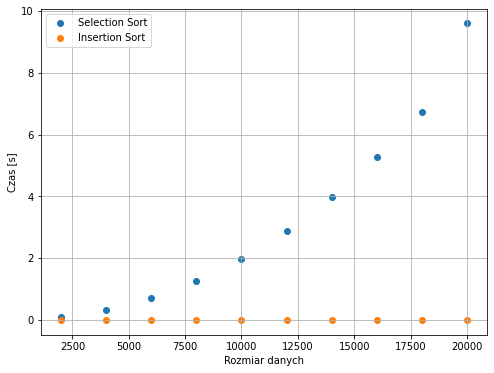

In [48]:
y1 = wyniki['Selection Sort']
y2 = wyniki['Insertion Sort']

fig = plt.figure()
fig.set_size_inches(8, 6)
plt.scatter(SIZES_s, y1, label="Selection Sort", size=14)
plt.scatter(SIZES_s, y2, label="Insertion Sort", size=14)
plt.xlabel('Rozmiar danych')
plt.ylabel('Czas [s]')
plt.legend()
plt.grid()
plt.show()

Porównując oba algorytmy naiwne możemy zauważyć, że Insertion Sort radzi sobie zdecydowanie lepiej z coraz większymi listami danych. Na wykresie tempo jego wzrostu jest w przybliżeniu liniowe, a czas wykonywania Selection Sort rośnie podobnie jak funkcja kwadratowa. Z obserwacji poczynionych w trakcie tworzenia sprawozdania mogę jednak powiedzieć, że dla większych zbiorów liczy sortowanie Insertion Sortem trwa również relatywnie wolno.

In [49]:
wyniki = {'SelectionSort':[9.6, 9.48, 9, 9.38, 9.54],
          'InsertionSort':[0.000164, 0.000169, 0.000162, 0.000165, 0.000163]}

df_naive = pd.DataFrame(wyniki, index=DANE)
df_naive

,SelectionSort,InsertionSort
Losowe,9.60,0.000164
Posortowane rosnąco,9.48,0.000169
Posortowane malejąco,9.00,0.000162
A-kształtne,9.38,0.000165
V-kształtne,9.54,0.000163


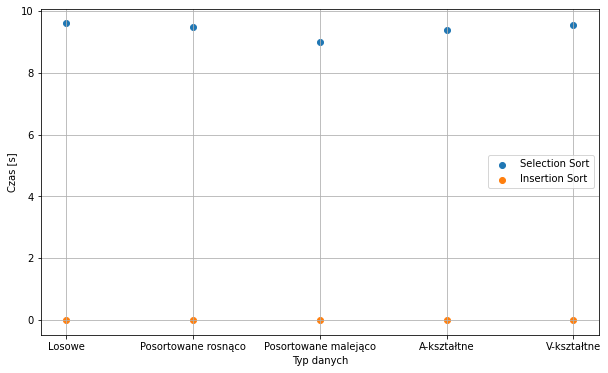

In [52]:
y1 = wyniki['SelectionSort']
y2 = wyniki['InsertionSort']

fig = plt.figure()
fig.set_size_inches(10, 6)
plt.scatter(DANE, y1, label="Selection Sort")
plt.scatter(DANE, y2, label="Insertion Sort")
plt.xlabel('Typ danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()
plt.show()

Jeśli chodzi o to jak algorytmy poradziły sobie z poszczególnymi typami danych, Selection Sort był nieznacznie szybszy przy danych już posortowanych.

### Sortowanie przez scalanie
Algorytm sortowania przez scalanie wydaje się pozornie prosty, ale kluczem do jego zaimplementowania jest napisanie odpowiednio funkcji scalania, która włoży w odpowiedniej kolejności wszystkie elementy do oryginalnej tablicy.

In [18]:
def MergeSort(tab):
    if len(tab) > 1:
        p = len(tab)//2

        A = tab[:p]
        B = tab[p:]

        MergeSort(A)
        MergeSort(B)

        i = 0
        j = 0
        k = 0

        a = len(A)
        b = len(B)

        while i < a and j < b:
            if A[i] < B[j]:
                tab[k] = A[i]
                i = i + 1
            else:
                tab[k] = B[j]
                j = j + 1
            k = k + 1

            if i == a:
                while j < b:
                    tab[k] = B[j]
                    j = j + 1
            if j == b:
                while i < a:
                    tab[k] = A[i]
                    i = i + 1
    return tab

In [19]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_random[SIZES[i]])
    %timeit MergeSort(t[SIZES[i]])

Testuję dla:  200000
838 ms ± 46.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
1.18 s ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.86 s ± 51.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
2.54 s ± 151 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
3.22 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
4.03 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
4.86 s ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
5.48 s ± 252 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
6.37 s ± 281 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
7.29 s ± 316 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_asc[SIZES[i]])
    %timeit MergeSort(t[SIZES[i]])

Testuję dla:  200000
511 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
1.12 s ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.84 s ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
2.5 s ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
3.96 s ± 510 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
4.56 s ± 726 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
5.1 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
5.63 s ± 46.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
6.45 s ± 72.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
7.48 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_desc[SIZES[i]])
    %timeit MergeSort(t[SIZES[i]])

Testuję dla:  200000
529 ms ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
1.12 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.92 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
2.71 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
3.92 s ± 579 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
3.66 s ± 252 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
4.37 s ± 287 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
5.64 s ± 608 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
6.14 s ± 405 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
7.5 s ± 1.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_v[SIZES[i]])
    %timeit MergeSort(t[SIZES[i]])

Testuję dla:  200000
798 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
1.15 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.73 s ± 62.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
2.39 s ± 78.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
3.05 s ± 86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
3.79 s ± 90.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
4.47 s ± 184 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
5.23 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
6.09 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
6.89 s ± 216 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_a[SIZES[i]])
    %timeit MergeSort(t[SIZES[i]])

Testuję dla:  200000
472 ms ± 9.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
1.04 s ± 41.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.75 s ± 96.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
2.58 s ± 251 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
3.56 s ± 343 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
4.59 s ± 931 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
6.23 s ± 846 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
5.1 s ± 400 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
5.78 s ± 454 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
6.51 s ± 470 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Quick Sort
Według mnie jest to jeden z najtrudniejszych do zaimplementowania algorytmów, ponieważ należy w nim operować i kontrolować jednocześnie dwa indeksy, a także wywoływać rekurencyjnie dwnie funkcje, z czego wymagają one oprócz tablicy jeszcze dwóch argumentów.

In [25]:
def QuickSort(tab, left, right):
    i = left
    j = right
    x = tab[(left + right ) // 2]
    while i <= j:
        while tab[i] < x:
             i = i + 1
        while tab[j] > x:
             j = j - 1
        if i <= j:
            tab[i], tab[j] = tab[j], tab[i]
            i = i + 1
            j = j - 1
    if left < j:
        QuickSort(tab, left, j)
    if right > i:
        QuickSort(tab, i, right)
    return tab

In [26]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_random[SIZES[i]])
    %timeit QuickSort(t[SIZES[i]], 0, SIZES[i]-1)

Testuję dla:  200000
244 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
591 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
991 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
1.38 s ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
1.81 s ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
2.22 s ± 8.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
2.7 s ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
3.25 s ± 82.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
3.71 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
4.28 s ± 363 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_asc[SIZES[i]])
    %timeit QuickSort(t[SIZES[i]], 0, SIZES[i]-1)

Testuję dla:  200000
255 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
654 ms ± 99.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.05 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
1.45 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
2.09 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
2.74 s ± 188 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
3.02 s ± 228 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
3.36 s ± 346 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
3.83 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
4.31 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_desc[SIZES[i]])
    %timeit QuickSort(t[SIZES[i]], 0, SIZES[i]-1)

Testuję dla:  200000
310 ms ± 51.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
646 ms ± 52.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.26 s ± 74.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
1.77 s ± 164 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
2.12 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
2.75 s ± 171 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
3.55 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
3.57 s ± 254 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
3.77 s ± 165 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
4.35 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_v[SIZES[i]])
    %timeit QuickSort(t[SIZES[i]], 0, SIZES[i]-1)

Testuję dla:  200000
260 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
616 ms ± 28.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.02 s ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
1.47 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
1.83 s ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
2.29 s ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
2.9 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
3.4 s ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
3.71 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
4.57 s ± 198 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_a[SIZES[i]])
    %timeit QuickSort(t[SIZES[i]], 0, SIZES[i]-1)

Testuję dla:  200000
254 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
718 ms ± 87.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
1.01 s ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
1.46 s ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
2.22 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
2.39 s ± 99.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
2.77 s ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
3.31 s ± 235 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
3.93 s ± 156 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
4.3 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Sortowanie przez zliczanie
Algorytm sortowania przez zliczanie wymaga dodatkowej tablicy, w której ostatecznie znajdą się posortowane dane.

In [31]:
def CountingSort(tab):
    count = [0 for _ in range( max(tab) + 1 )]
    
    sortedtab = [0 for _ in range(len(tab))]
    for el in tab:
        count[el] += 1

    for i in range(1, len(count)):
        count[i] = count[i-1] + count[i]

    for i in range(len(tab)-1, -1, -1):
        sortedtab[count[tab[i]] - 1] = tab[i]
        count[tab[i]] = count[tab[i]] - 1
    
    return sortedtab

In [32]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_random[SIZES[i]])
    %timeit CountingSort(t[SIZES[i]])

Testuję dla:  200000
128 ms ± 9.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  400000
242 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
406 ms ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
484 ms ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
544 ms ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
632 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
748 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
844 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
944 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
1.04 s ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_asc[SIZES[i]])
    %timeit CountingSort(t[SIZES[i]])

Testuję dla:  200000
106 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  400000
205 ms ± 7.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
299 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
414 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
513 ms ± 8.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
620 ms ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
722 ms ± 30 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
822 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
943 ms ± 23.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
1.03 s ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_desc[SIZES[i]])
    %timeit CountingSort(t[SIZES[i]])

Testuję dla:  200000
107 ms ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  400000
205 ms ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
317 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
417 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
540 ms ± 44.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
654 ms ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
781 ms ± 67.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
855 ms ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
975 ms ± 90.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
1.08 s ± 81.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_v[SIZES[i]])
    %timeit CountingSort(t[SIZES[i]])

Testuję dla:  200000
119 ms ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Testuję dla:  400000
360 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
535 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
726 ms ± 21.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
912 ms ± 41.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
1.09 s ± 36.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
1.27 s ± 31.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
1.5 s ± 96.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
1.64 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
1.96 s ± 98.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
t = {}
for i in range(10):
    print("Testuję dla: ", SIZES[i])
    t[SIZES[i]] = copy.deepcopy(TAB_a[SIZES[i]])
    %timeit CountingSort(t[SIZES[i]])

Testuję dla:  200000
238 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  400000
406 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  600000
603 ms ± 35.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  800000
779 ms ± 65.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1000000
958 ms ± 36.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1200000
1.11 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1400000
1.32 s ± 36.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1600000
1.53 s ± 63.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  1800000
1.75 s ± 53.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Testuję dla:  2000000
2.02 s ± 57.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Podsumowanie algorytmów szybkich

In [14]:
wyniki = {'Merge Sort':[0.838,1.18,1.86,2.54,3.22,4.03,4.86,5.48,6.37,7.29],
          'Quick Sort':[0.224,0.591,0.991,1.38,1.81,2.22,2.7,3.25,3.71,4.28],
          'Counting Sort':[0.128,0.242,0.406,0.484,0.545,0.632,0.748,0.844,0.944,1.04]
         }

df_naive = pd.DataFrame(wyniki, index=SIZES)
df_naive

,MergeSort,QuickSort,CountingSort
200000,0.838,0.224,0.128
400000,1.180,0.591,0.242
600000,1.860,0.991,0.406
800000,2.540,1.380,0.484
1000000,3.220,1.810,0.545
1200000,4.030,2.220,0.632
1400000,4.860,2.700,0.748
1600000,5.480,3.250,0.844
1800000,6.370,3.710,0.944
2000000,7.290,4.280,1.040


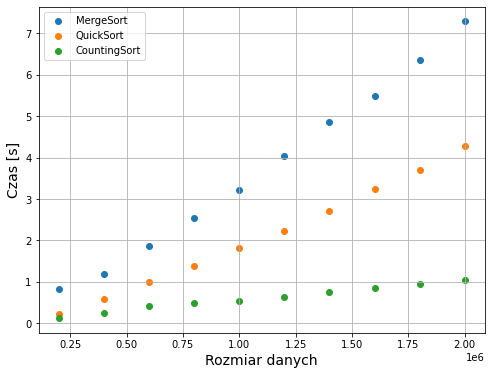

In [15]:
y1 = wyniki['Merge Sort']
y2 = wyniki['Quick Sort']
y3 = wyniki['Counting Sort']

fig = plt.figure()
fig.set_size_inches(8, 6)
plt.scatter(SIZES, y1, label="Merge Sort")
plt.scatter(SIZES, y2, label="Quick Sort")
plt.scatter(SIZES, y3, label="Counting Sort")
plt.xlabel('Rozmiar danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()
plt.show()

Pod względem szybkości algorytmy uplasowały się następująco: Counting Sort, Quick Sort, Merge Sort, identcznie rośnie czas ich wykonywania wraz z sortowaniem coraz dłuższej listy danych.

In [9]:
wyniki = {'MergeSort':[7.29,7.48,7.5,6.89,6.51],
          'QuickSort':[4.28,4.31,4.35,4.57,4.3],
          'CountingSort': [1.04,1.03,1.08,1.96,2.02]}

df_naive = pd.DataFrame(wyniki, index=DANE)
df_naive

,MergeSort,QuickSort,CountingSort
Losowe,7.29,4.28,1.04
Posortowane rosnąco,7.48,4.31,1.03
Posortowane malejąco,7.50,4.35,1.08
A-kształtne,6.89,4.57,1.96
V-kształtne,6.51,4.30,2.02


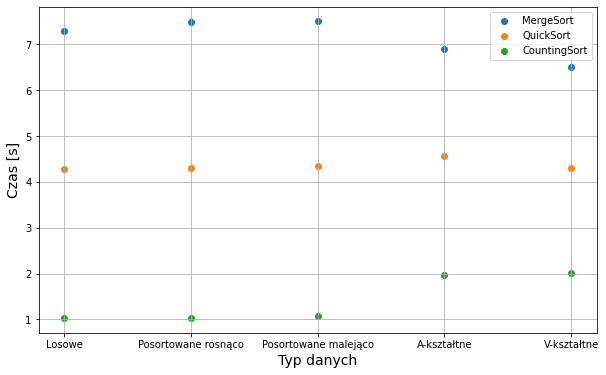

In [13]:
y1 = wyniki['Merge Sort']
y2 = wyniki['Quick Sort']
y3 = wyniki['Counting Sort']

fig = plt.figure()
fig.set_size_inches(10, 6)
plt.scatter(DANE, y1, label="Merge Sort")
plt.scatter(DANE, y2, label="Quick Sort")
plt.scatter(DANE, y3, label="Counting Sort")
plt.xlabel('Typ danych', size=14)
plt.ylabel('Czas [s]', size=14)
plt.legend()
plt.grid()
plt.show()

W przypadku algorytmów szybkich widać większe różnice w przypadku różnych typów danych. Dane posortowane rosnąco lub malejąco w niewielkim stopniu wpływają na czas wykonania. Co ciekawe, częściowe posortowanie w kształcie V i A spowodowało prawie dwukrotny wzrost czasu wykonania Counting Sorta. Z kolei czas wykonania Merge Sorta znacząco się zmiejszył. Niewielką zmianę w czasie wykonania widac również w przypadku Quick Sorta.